In [1]:
import os
import scanpy as sc

In [2]:
import numpy as np
import pandas as pd

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white', )

2023-11-07 16:36:20.109671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.8


In [8]:
adata = sc.read_h5ad('/Volumes/projects/C3_Sellgren_lab/Lab Members/Susmita/Internal data/Twin study/Multiome Analysis/kyna.h5ad')

In [9]:
adata

AnnData object with n_obs × n_vars = 18267 × 33204
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'Individual', 'doublet_DF', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'percent.Ribosomal', 'largest_gene', 'percent.Largest.Gene', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'integrated_snn_res.0.5', 'seurat_clusters', 'scDblFinder', 'integrated_snn_res.0.7', 'integrated_snn_res.0.9', 'cellclass', 'celltype'
    var: 'features'

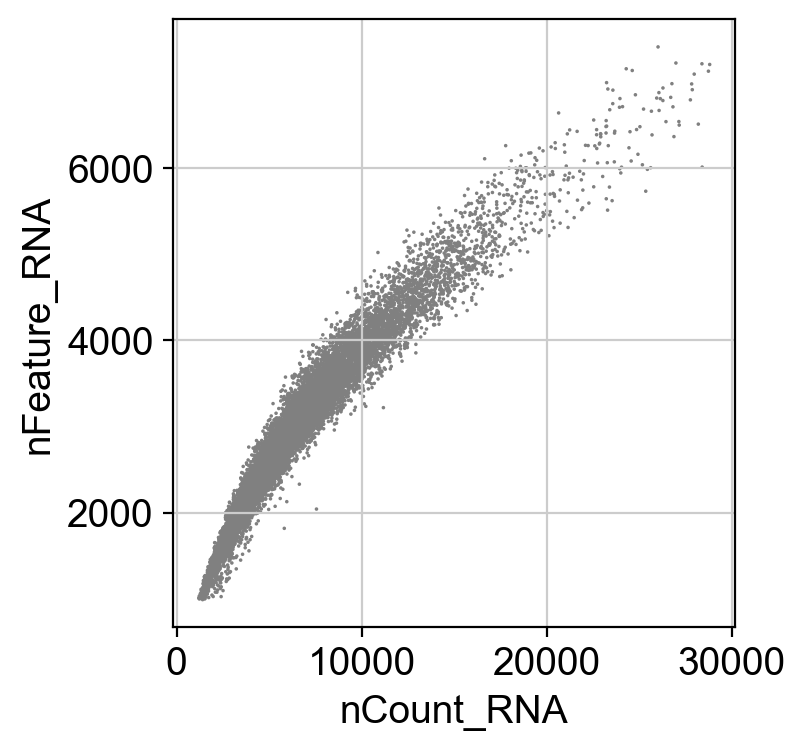

In [73]:
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA', save="scatter_twins_kyna.pdf")

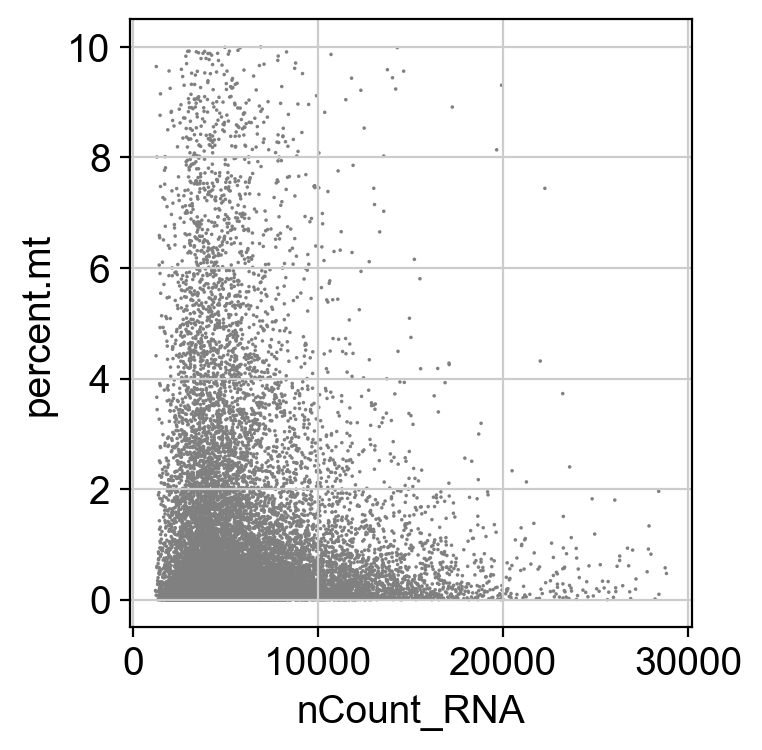

In [13]:
sc.pl.scatter(adata, x='nCount_RNA', y='percent.mt')

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:11)


In [12]:
sc.pp.log1p(adata)

In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:01:53)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [14]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
filtered out 278 genes that are detected in less than 1 counts
normalizing counts per cell
    finished (0:00:03)
extracting highly variable genes
    finished (0:00:30)
normalizing counts per cell
    finished (0:00:00)
    finished (0:02:55)


In [15]:
sc.tl.pca(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


In [16]:
import scanpy.external as sce

In [17]:
sce.pp.harmony_integrate(adata, 'Individual')

2023-08-15 15:15:18,608 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-15 15:15:27,156 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-15 15:15:27,481 - harmonypy - INFO - Iteration 1 of 10
2023-08-15 15:15:34,136 - harmonypy - INFO - Iteration 2 of 10
2023-08-15 15:15:39,642 - harmonypy - INFO - Iteration 3 of 10
2023-08-15 15:15:46,960 - harmonypy - INFO - Iteration 4 of 10
2023-08-15 15:15:52,804 - harmonypy - INFO - Iteration 5 of 10
2023-08-15 15:15:58,515 - harmonypy - INFO - Iteration 6 of 10
2023-08-15 15:16:05,292 - harmonypy - INFO - Iteration 7 of 10
2023-08-15 15:16:08,248 - harmonypy - INFO - Iteration 8 of 10
2023-08-15 15:16:10,667 - harmonypy - INFO - Iteration 9 of 10
2023-08-15 15:16:12,746 - harmonypy - INFO - Converged after 9 iterations


In [20]:
%%time
sc.external.pp.bbknn(adata, batch_key='Individual')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
CPU times: user 3.39 s, sys: 1.22 s, total: 4.61 s
Wall time: 6.85 s


In [21]:
#sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


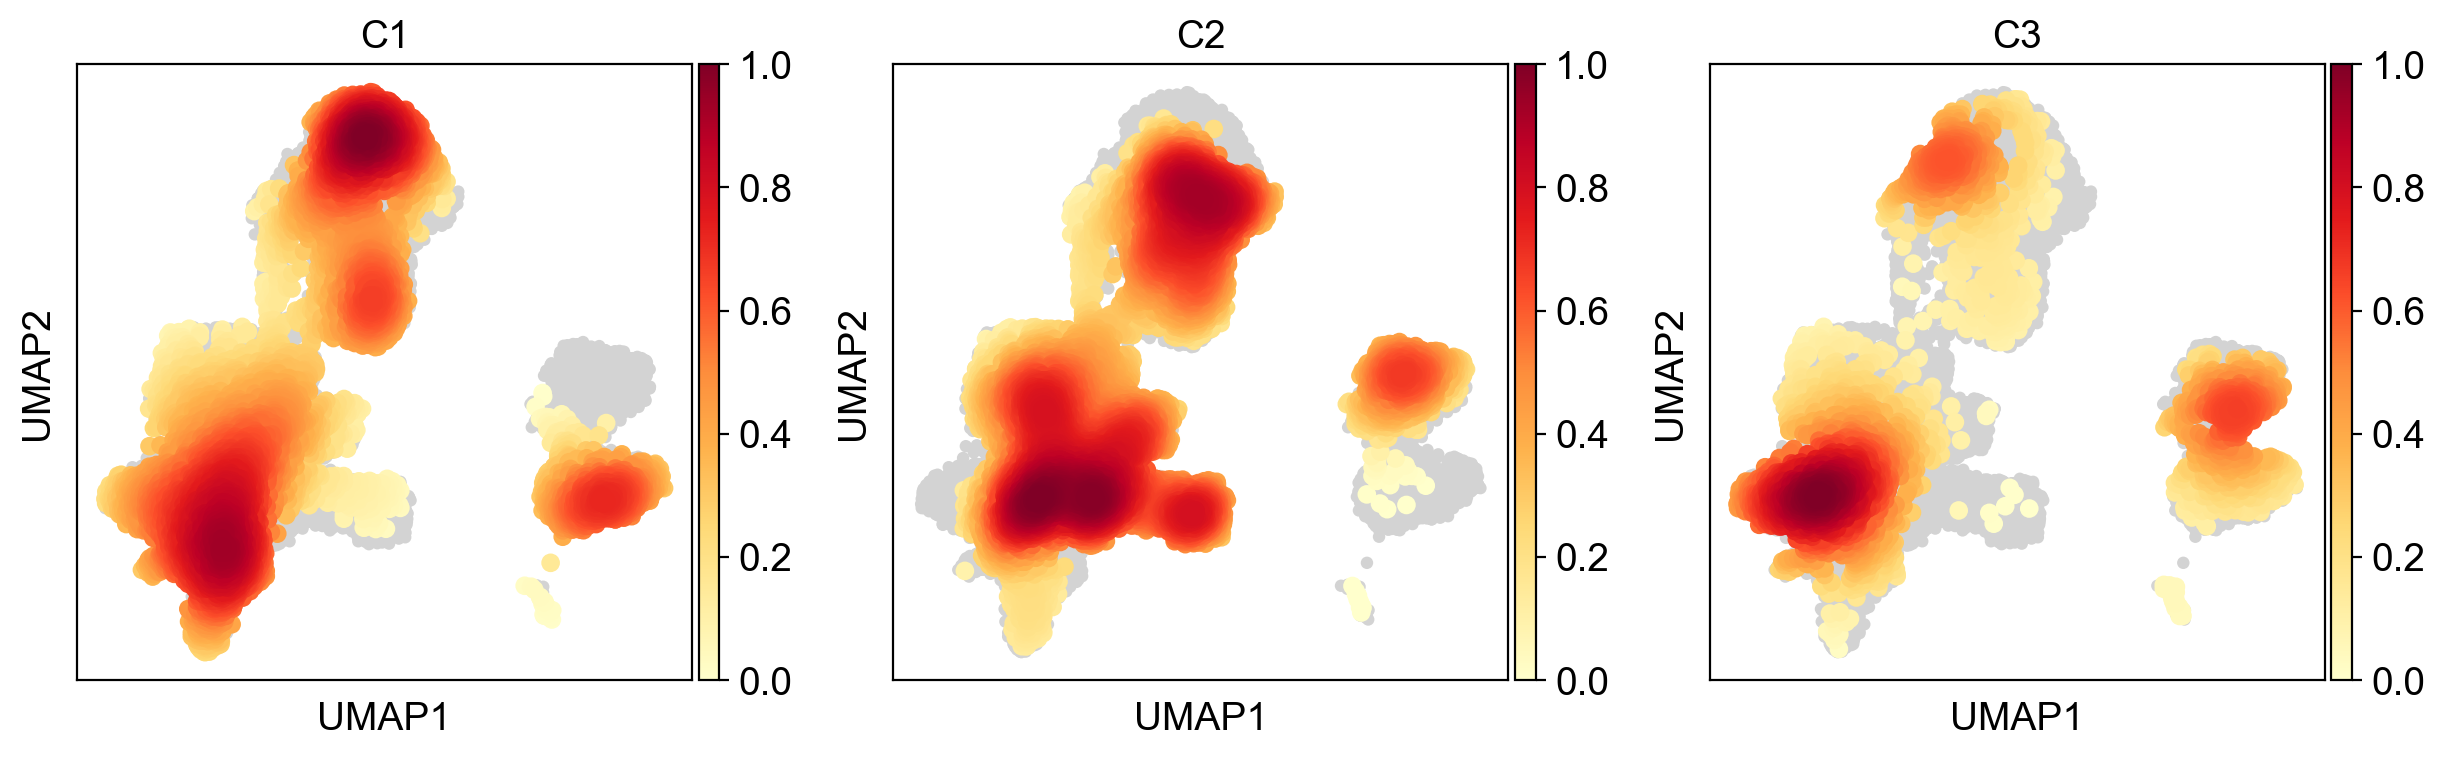

In [16]:
#sc.tl.embedding_density(adata, groupby='Individual')
sc.pl.embedding_density(adata, groupby='Individual')
#check if integration has worked via bbknn

/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


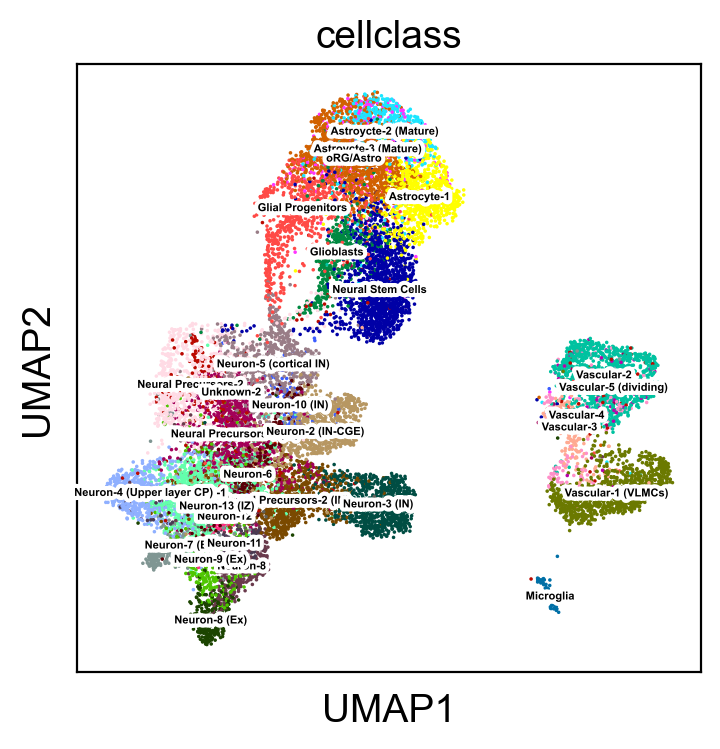

In [50]:
sc.pl.umap(adata, color=['cellclass'], legend_loc='on data', legend_fontsize=4, legend_fontoutline=3,frameon=False, save='.pdf')

In [24]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)


/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


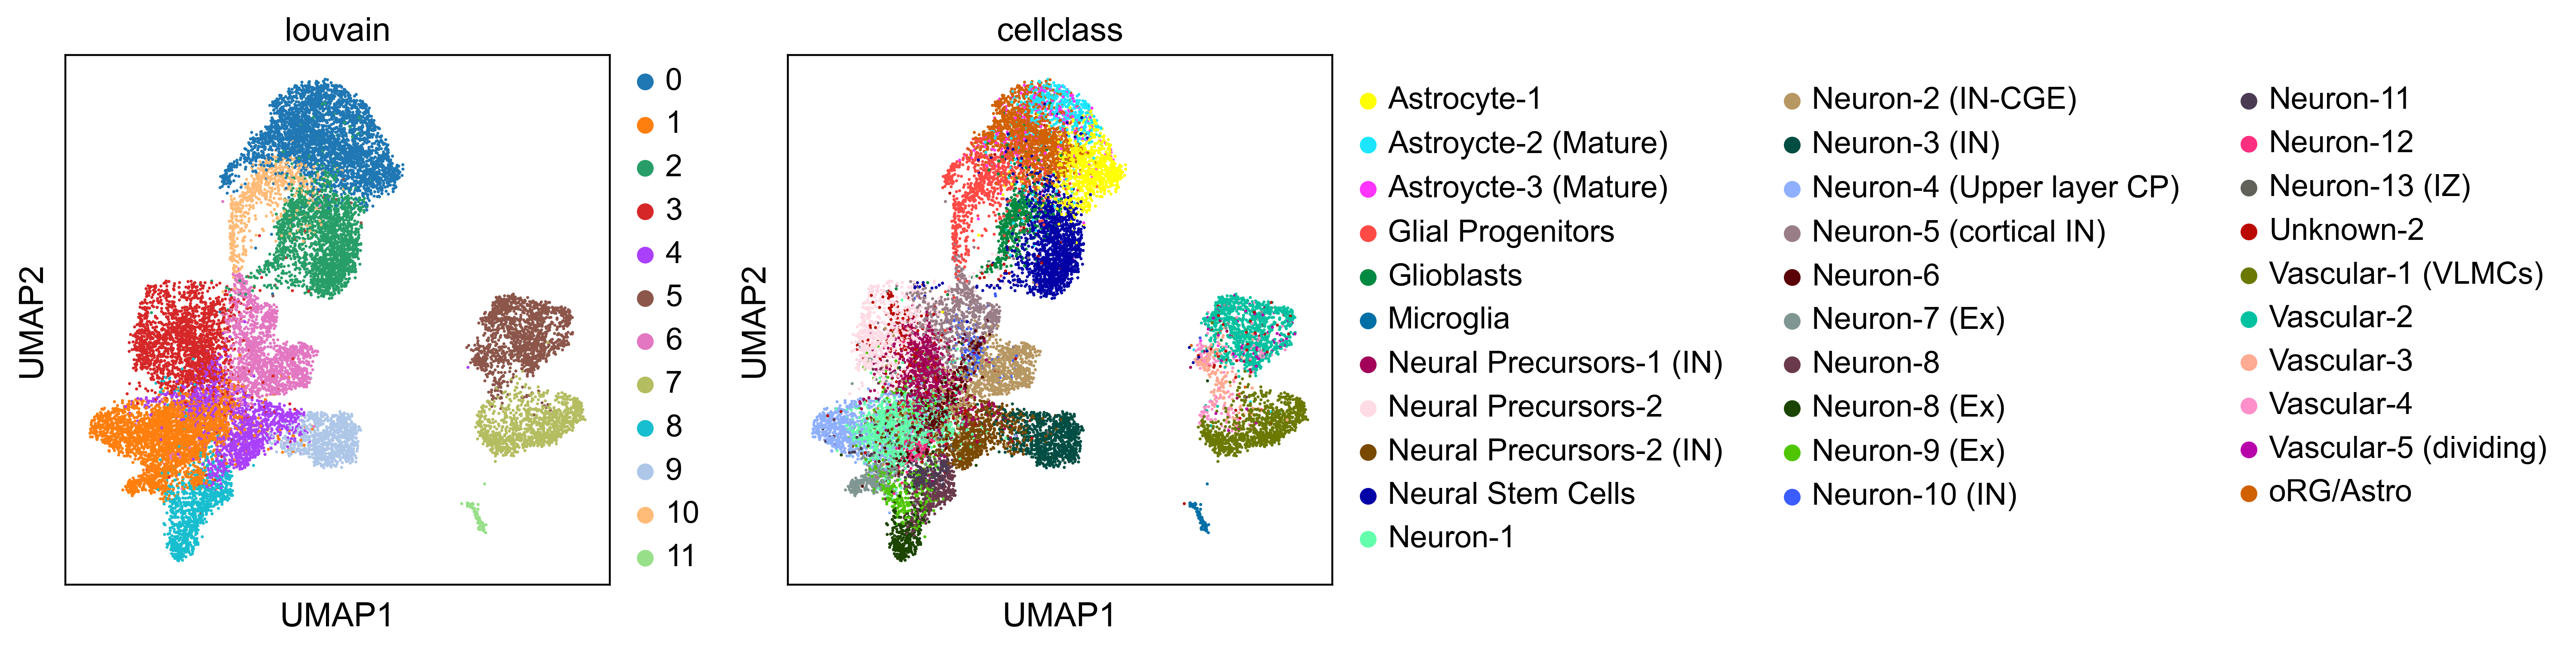

In [25]:
sc.pl.umap(adata, color=['louvain', 'cellclass'])

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:58)


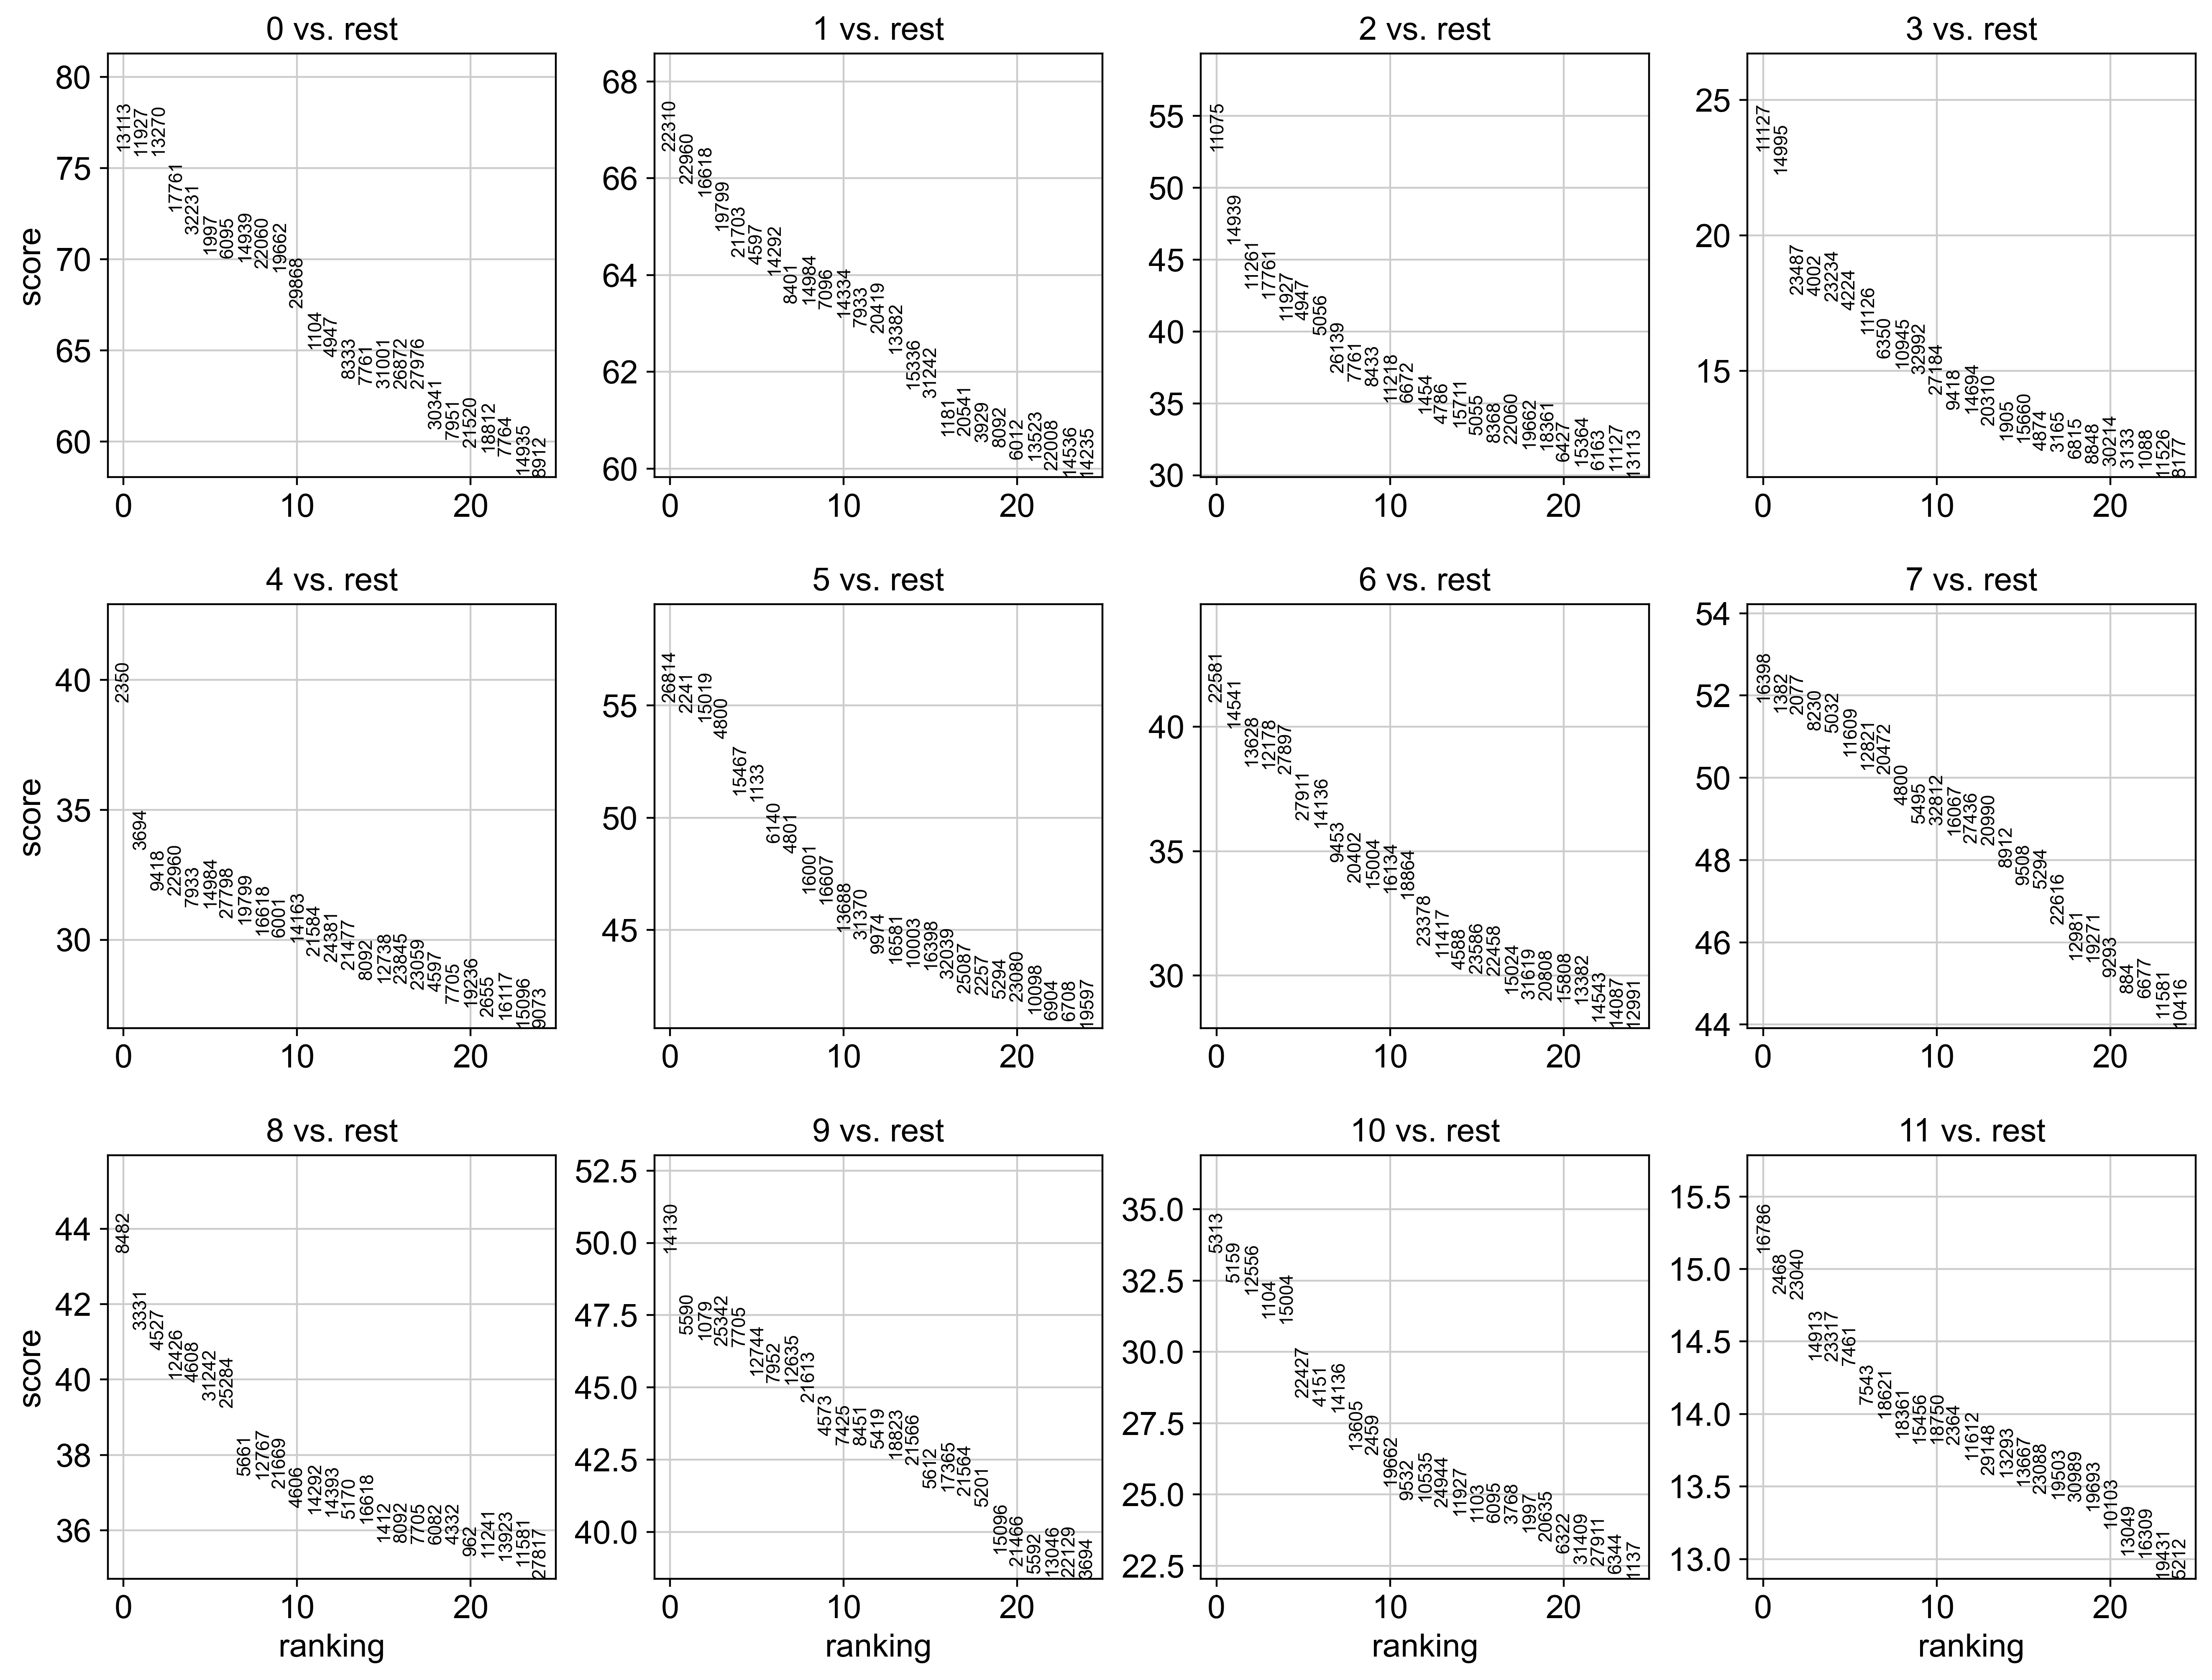

In [34]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon', key_added = "wilcoxon" )
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

In [41]:
df = pd.DataFrame(adata.obsm['X_umap'])

In [42]:
df 

0          1
0       1.698427   2.889120
1       1.609690  11.486605
2       3.273928  13.412417
3       1.433960  13.598125
4      -3.045907   0.167779
...          ...        ...
18262  -3.138517  -2.458748
18263  10.135498   1.127917
18264  -1.476865  -0.644204
18265  11.428433   3.791971
18266  -1.668311  -2.347650

[18267 rows x 2 columns]

In [43]:
df.to_csv('/Volumes/projects/C3_Sellgren_lab/Lab Members/Susmita/Internal data/Kyna/Kyna_twins_umap_coordinates.csv')

In [44]:
meta = adata.obs['louvain']

In [45]:
meta

1_AAACAGCCACGTGCTG-1    6
1_AAACAGCCATAATCAC-1    0
1_AAACAGCCATGTGGGA-1    0
1_AAACATGCAAGCGATG-1    0
1_AAACATGCAAGGTCCT-1    1
                       ..
5_TTTGTGAAGTAAGTCC-1    8
5_TTTGTGGCAAGGTGGC-1    7
5_TTTGTGGCATAGCTGC-1    4
5_TTTGTGTTCAATTACG-1    5
5_TTTGTTGGTGAATCGC-1    8
Name: louvain, Length: 18267, dtype: category
Categories (12, object): ['0', '1', '2', '3', ..., '8', '9', '10', '11']

In [46]:
meta.to_csv("/Volumes/projects/C3_Sellgren_lab/Lab Members/Susmita/Internal data/Kyna/Kyna_twins_louvain_scanpy.csv")

In [ ]:
#the umap coordinates and louvain clusters were imported into r to find markers via MAST tests. 

In [55]:
## Cluster annotations
new_cluster_names = [
    'Astrocytes/oRG', 'Cortical Neurons-1', 'NSCs/Radial Glia', 'Neural progenitors-1', 
    'Neural progenitors-2', 'Progenitors-1','Interneurons', 'Progenitors-2','Cortical Neurons-2', 
    'Hip-Neurons','Glioblasts','Microglia']

adata.rename_categories('louvain', new_cluster_names)

/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/anndata/_core/anndata.py:1160: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  self.obs[key].cat.rename_categories(categories, inplace=True)


In [52]:
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:02)


In [53]:
sc.tl.louvain(adata, resolution = 0.8, key_added = "louvain_0.8")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain_0.8', the cluster labels (adata.obs, categorical) (0:00:02)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 18 clusters and added
    'louvain_1.4', the cluster labels (adata.obs, categorical) (0:00:02)


/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


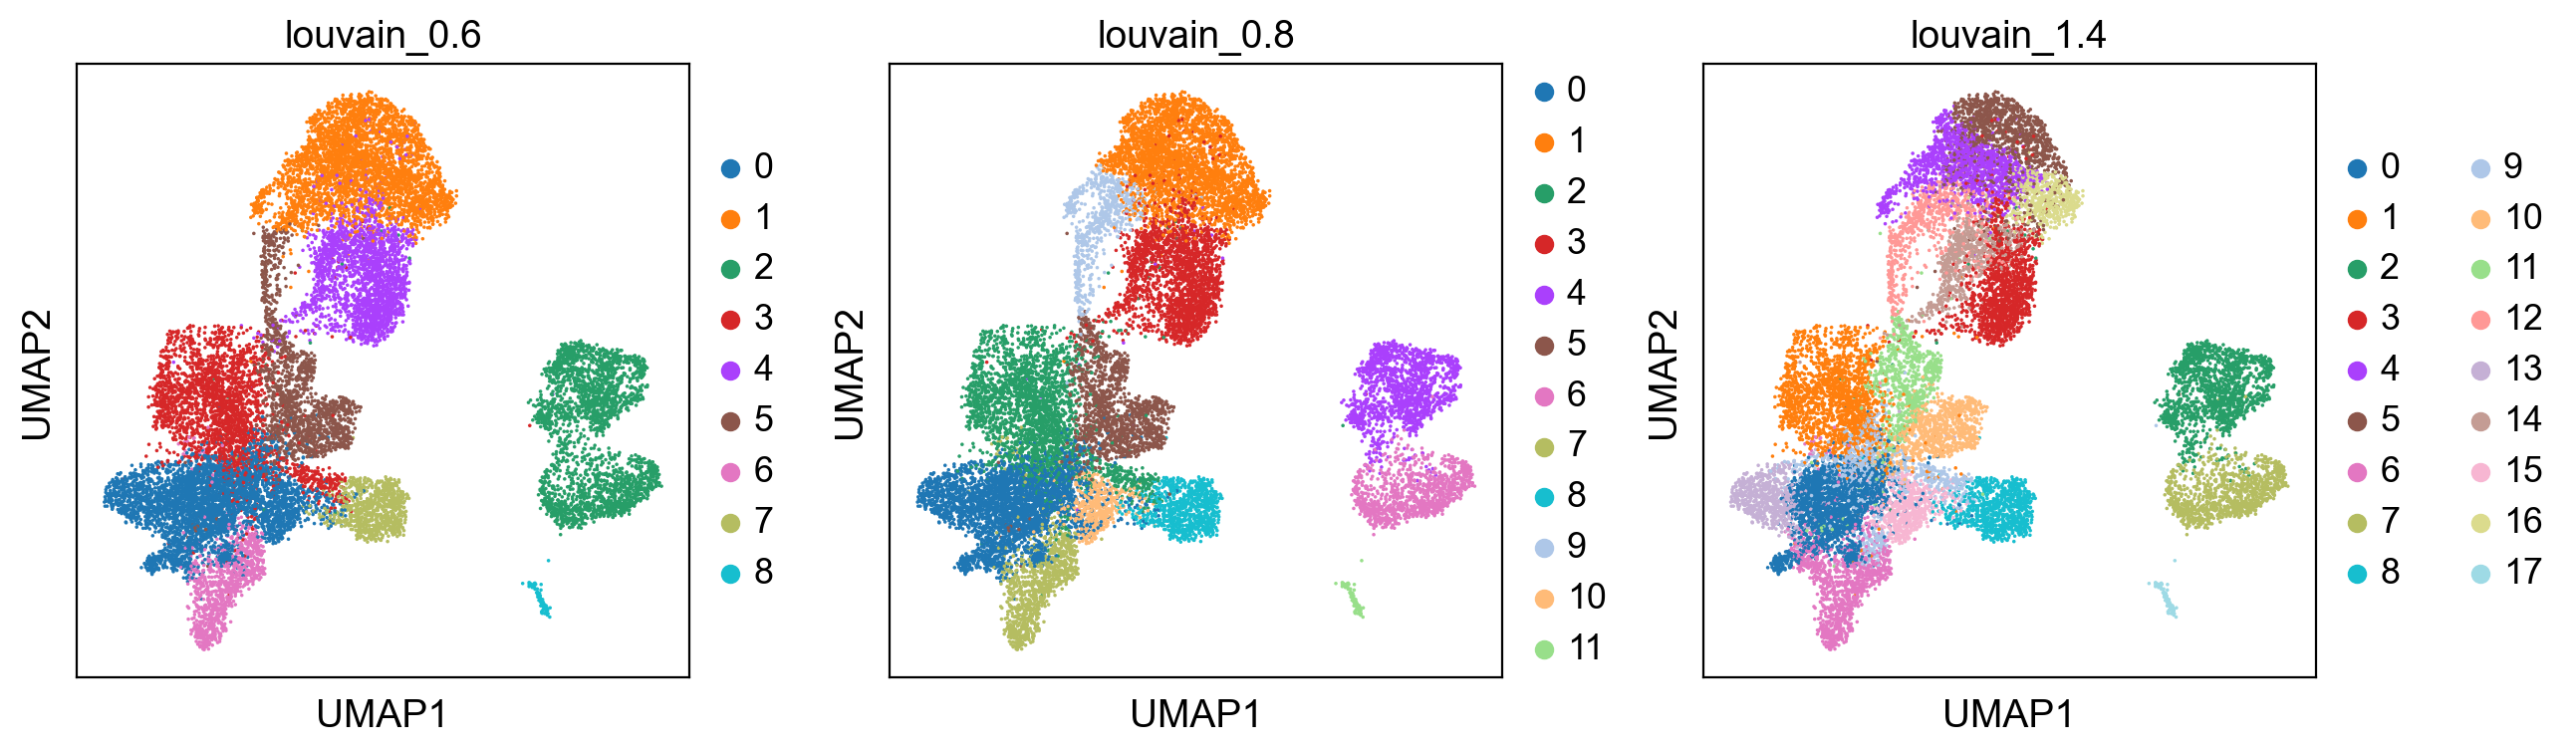

In [54]:
sc.pl.umap(adata, color=['louvain_0.6', 'louvain_0.8','louvain_1.4'])

/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


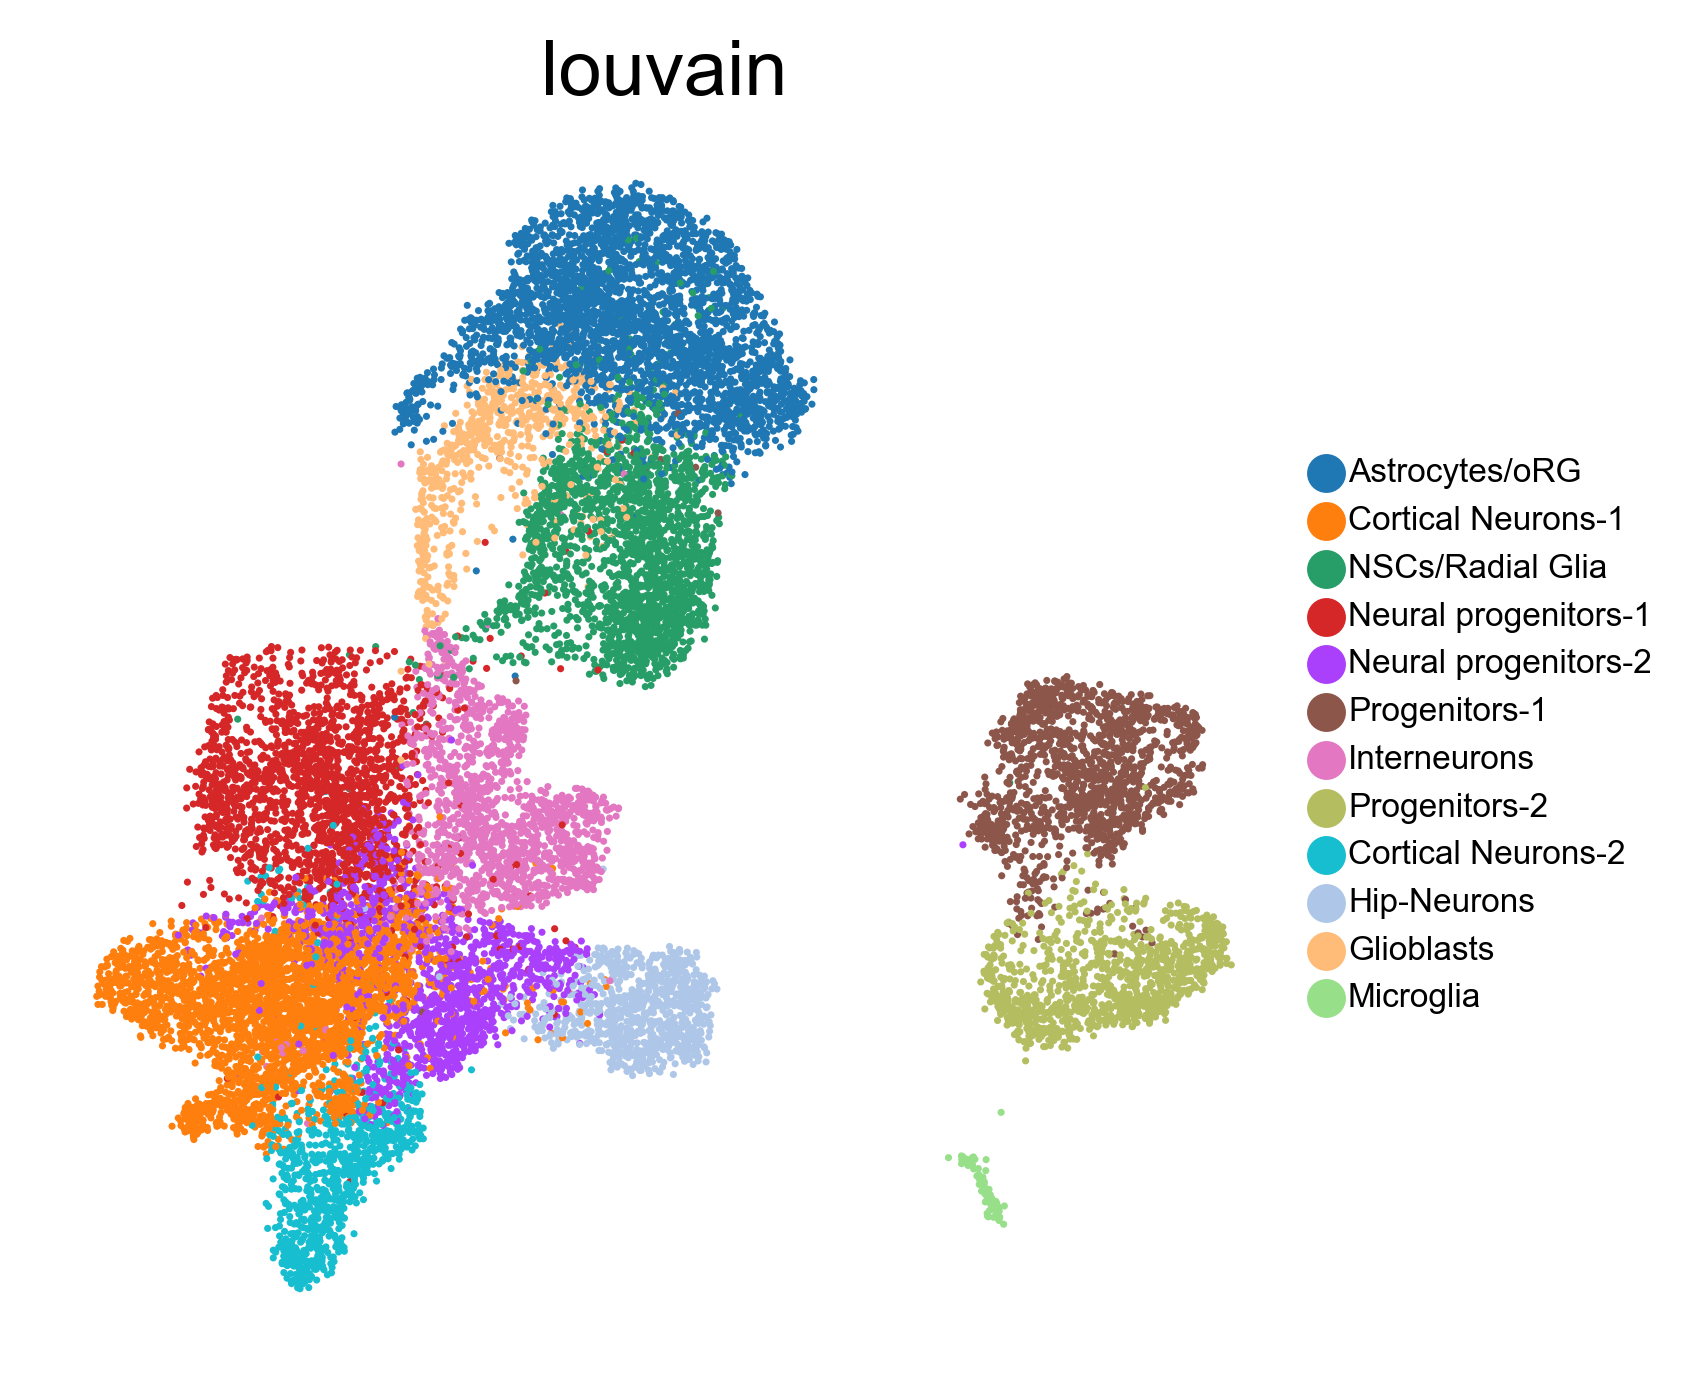

In [68]:
sc.pl.umap(adata, color=['louvain'], legend_fontsize=6, legend_fontoutline=3, frameon=False, save="legend.pdf")

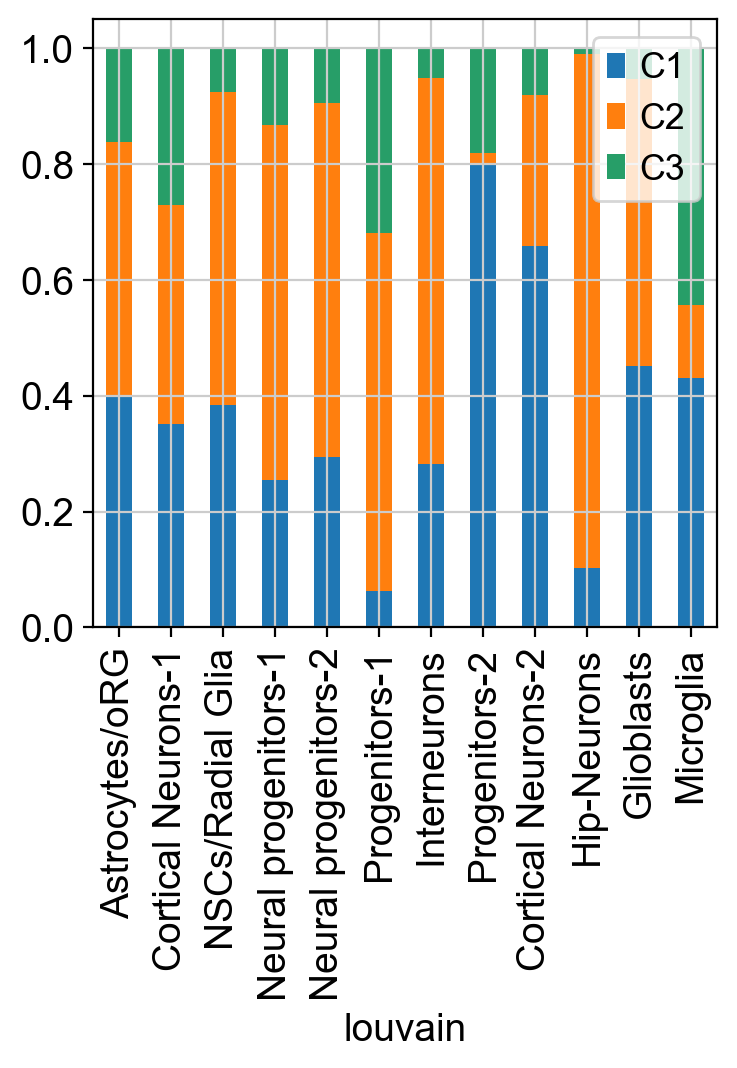

In [14]:
tmp = pd.crosstab(adata.obs['louvain'],adata.obs['Individual'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper right')

/Users/susmita.malwade/miniconda3/envs/scrna/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


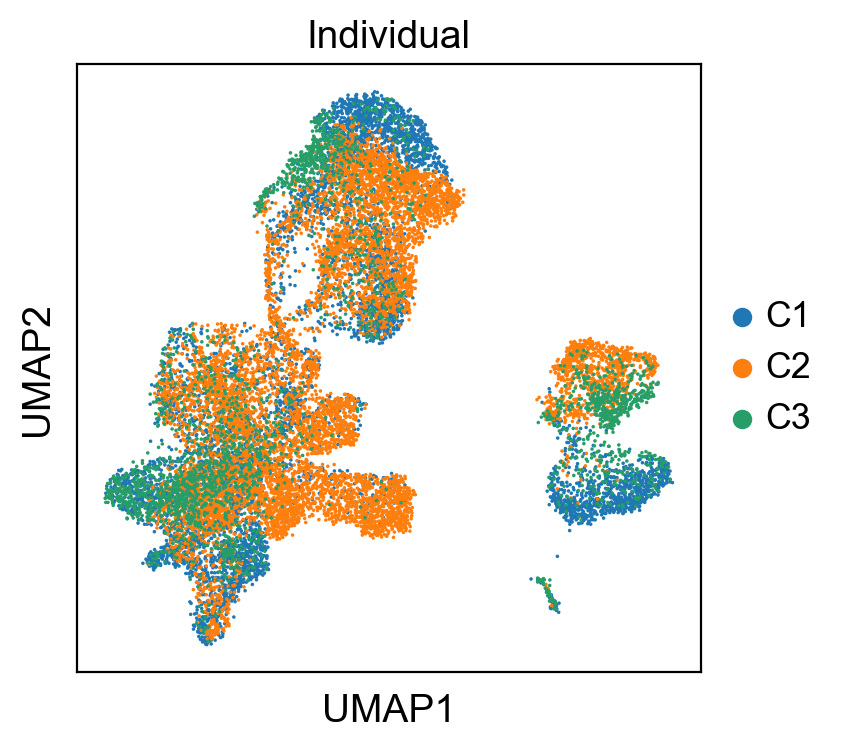

In [15]:
sc.pl.umap(adata, color=['Individual'])#, save="batch.pdf")

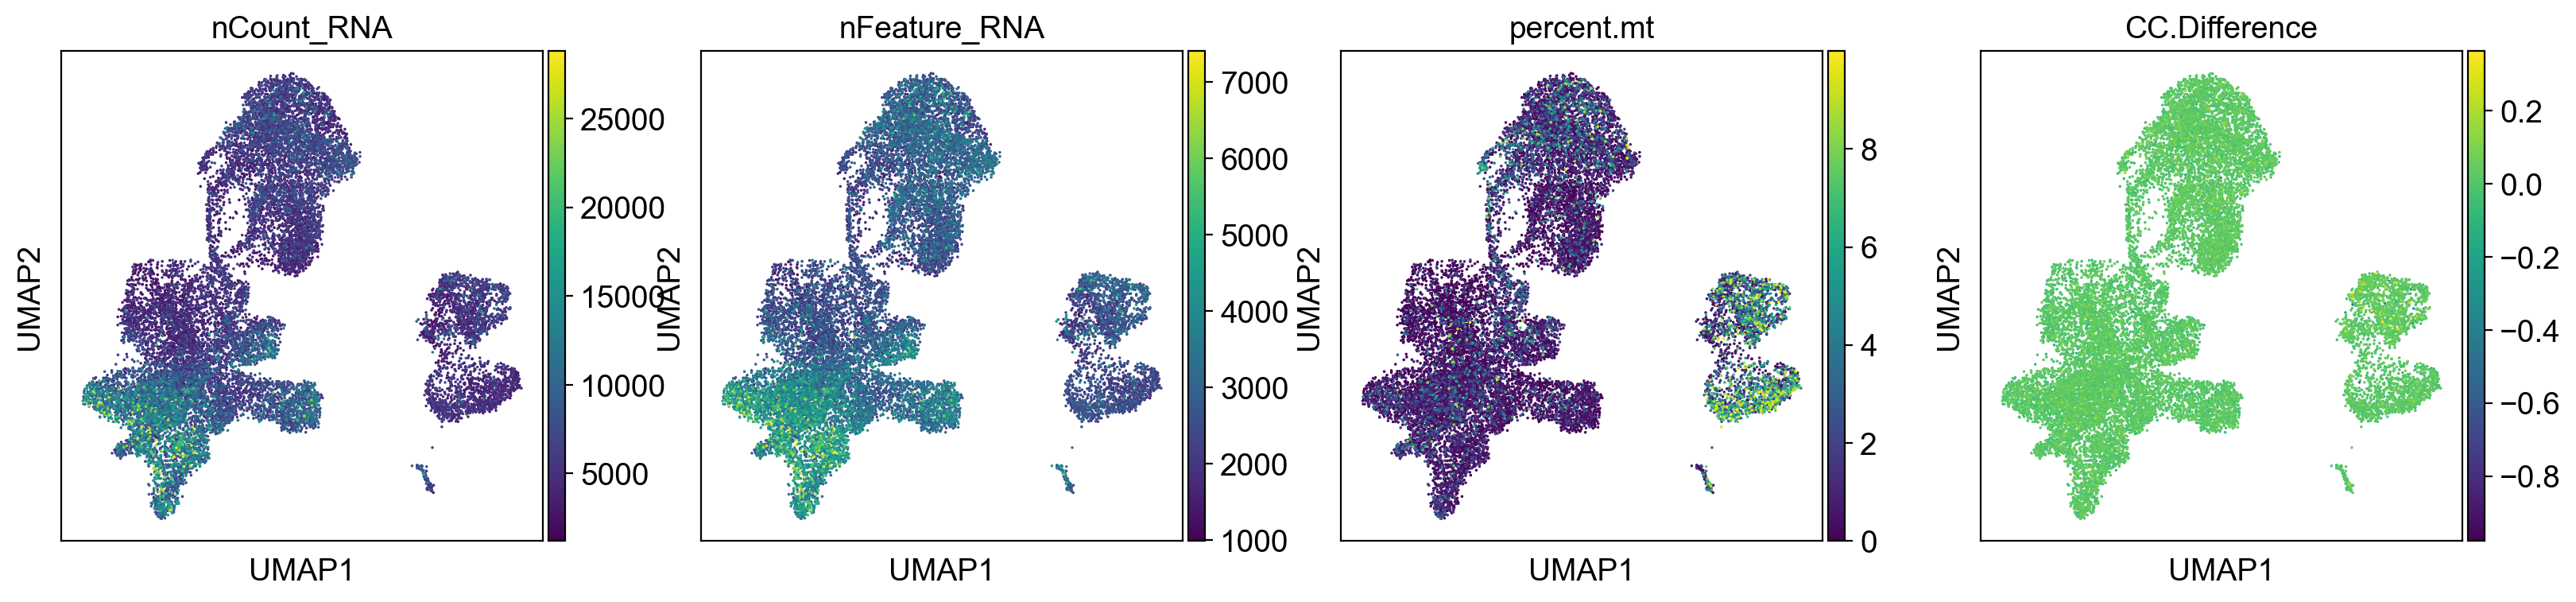

In [77]:
sc.pl.umap(adata, color=['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'CC.Difference'])

In [76]:
adata

AnnData object with n_obs × n_vars = 18267 × 1000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'Individual', 'doublet_DF', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'percent.Ribosomal', 'largest_gene', 'percent.Largest.Gene', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'integrated_snn_res.0.5', 'seurat_clusters', 'scDblFinder', 'integrated_snn_res.0.7', 'integrated_snn_res.0.9', 'cellclass', 'celltype', 'n_counts_all', 'louvain', 'umap_density_Individual', 'louvain_0.6', 'louvain_0.8', 'louvain_1.4'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Individual_colors', 'cellclass_colors', 'louvain', 'louvain_colors', 'wilcoxon', 'umap_density_Individual_params', 'louvain_0.6_colors', 'louvain_0.8_colors', 'louvain_1.4_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [79]:
adata.__dict__['_raw'].__dict__['_var'] = adata.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [4]:
adata = sc.read_h5ad('Kyna_twins_processed.h5ad')

In [9]:
#replace_mapping = {'SZ1': 'C1', 'SZ11': 'C2', 'SZ17': 'C3'}


In [12]:
adata.obs['Individual'] = adata.obs['Individual'].replace(replace_mapping)

In [ ]:
adata.write('Kyna_twins_processed.h5ad')